<a href="https://colab.research.google.com/github/jgr11082003/CODEALPHA_DATASCIENCE/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [4]:
from google.colab import files
uploaded = files.upload()

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('unemployment_data')


!ls unemployment_data

Saving archive.zip to archive (2).zip
'Unemployment in India.csv'   Unemployment_Rate_upto_11_2020.csv


In [6]:

df = pd.read_csv('unemployment_data/Unemployment in India.csv')

In [7]:

print(df.head())


print(df.info())

print(df.describe())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colu

In [8]:

print(df.isnull().sum())


df = df.dropna()

print(df.duplicated().sum())


df = df.drop_duplicates()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
0


In [11]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


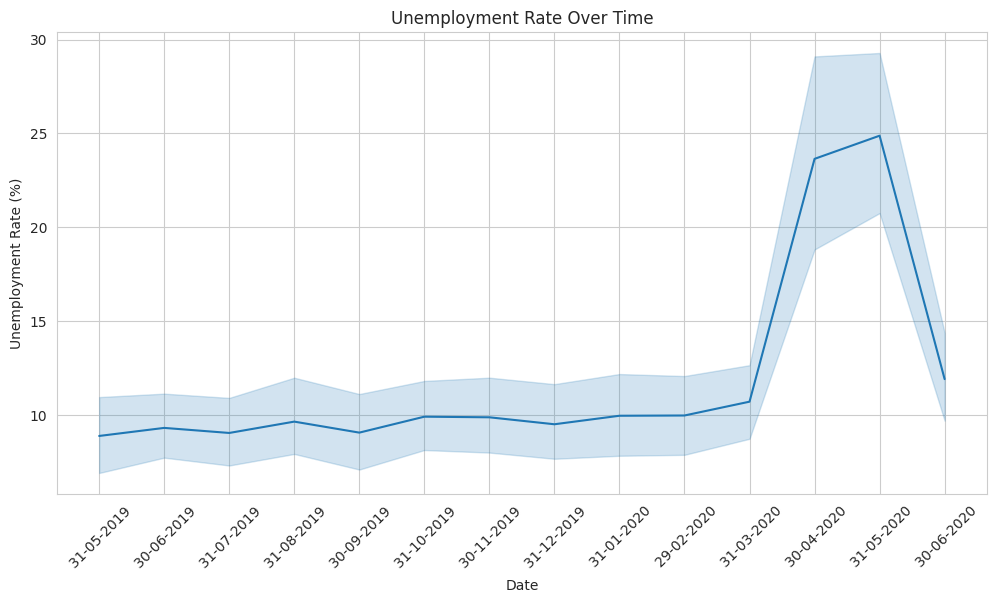

In [13]:

plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [14]:

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')


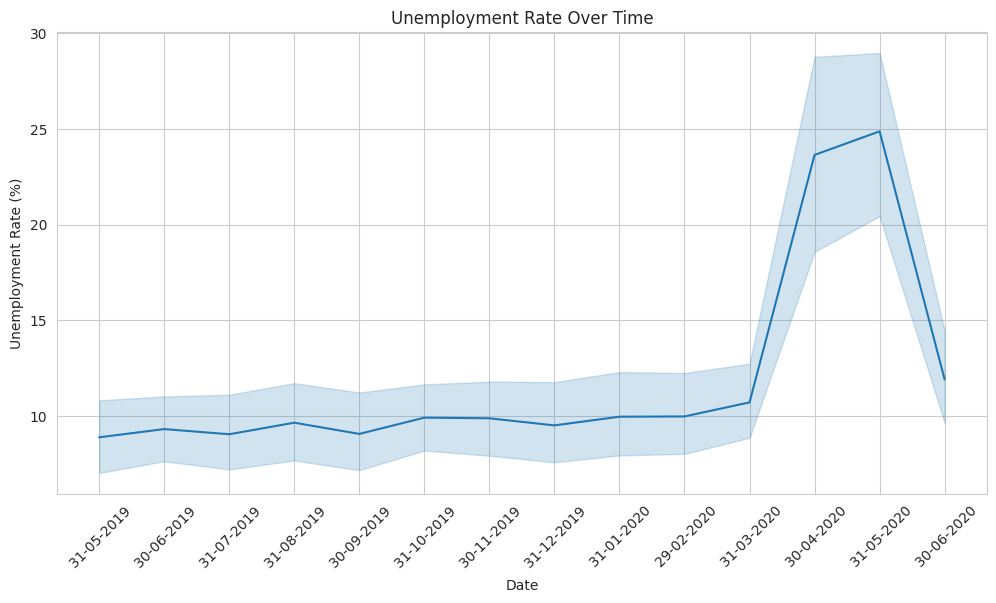

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate_(%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-17-b9c6864122be>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')


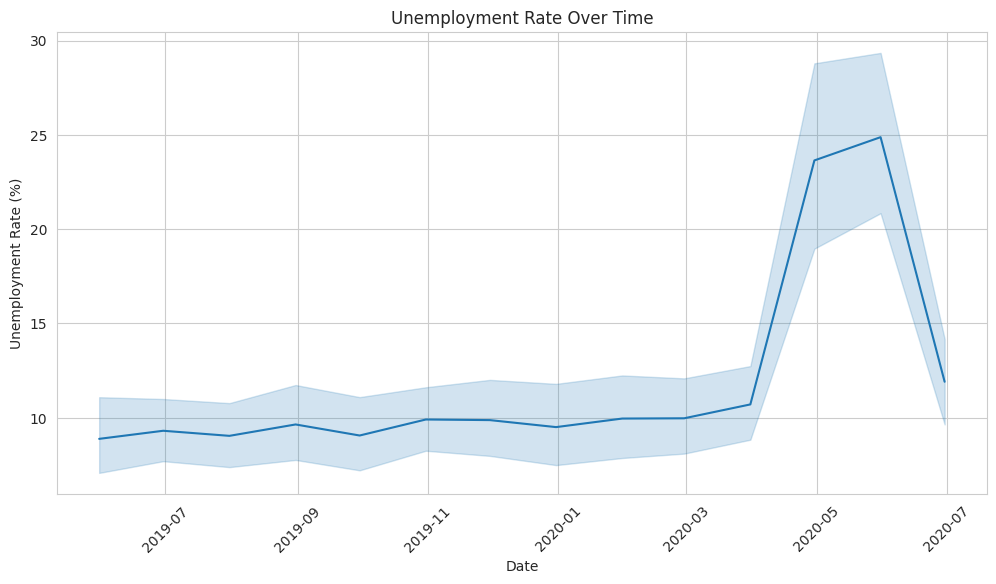

In [18]:

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate_(%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [19]:
df = df.rename(columns={'Old_Name': 'New_Name'})

In [20]:
# Conclusion
print("The analysis shows a significant increase in the unemployment rate during the Covid-19 pandemic. Certain regions were more affected than others, and the unemployment rate fluctuated over time.")

The analysis shows a significant increase in the unemployment rate during the Covid-19 pandemic. Certain regions were more affected than others, and the unemployment rate fluctuated over time.
